# Morphological Operators

Morphological opeators are sets of kernels that can achieve a variety of effects. 

- One example is that of noise reduction. 
- Another example is operators that are exceptionally good at reducing black spots on a white background or vice versa.
- Operators that can achieve an erosion and dialation effect to add or erode an existing image. This is most easily seen on textual data with white text on a black background.
 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### convenience functions

In [7]:
def load_img():
    blank_img = np.zeros((400,800))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="54321", org=(175, 250), fontFace=font, fontScale=5, color=(255,255,255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [8]:
def display_img(img):
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

# Background Noise Examples 

Below are some eamples of how we can reduce, or create background noise. Erosion and ilation techniques.

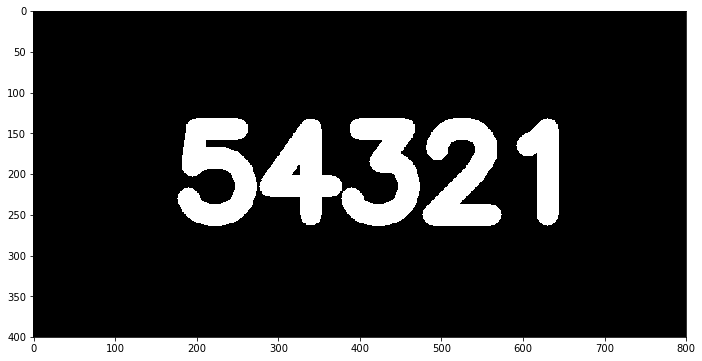

In [9]:
img = load_img()
display_img(img)

### Erosion with morpholigical operator kernels

Erodes away boundaries of foreground objects. Detect the edges between foreground (letters) and background and erode away at edges detected.

In [5]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

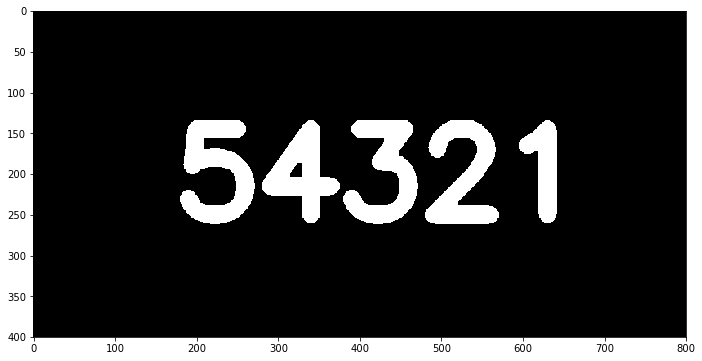

In [6]:
# inceasing the kernel size and the iterations
# will substantially incease the amount of 
# effect that can be visible in the result 
# produced in application. 
result = cv2.erode(img, kernel, iterations=1)
display_img(result)

In [7]:
# larger kernel sample 
kernel = np.ones((9,9), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

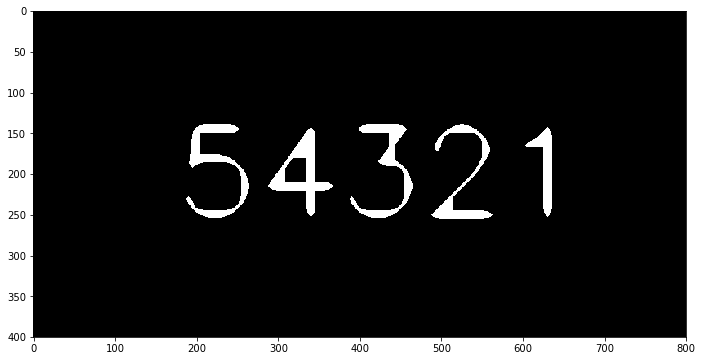

In [8]:
# larger kernel and 2 iterations can show the 
# damatic difference for the the first sample
# above.
result = cv2.erode(img, kernel, iterations=2)
display_img(result)

### Applying white noise to an image

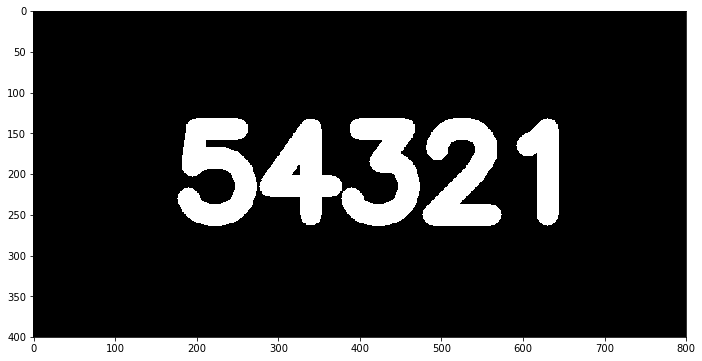

In [9]:
# reset the image 
img = load_img()
display_img(img)

In [10]:
# generate white noise. 
# create a 600,600 random values image 
# of black and white pixels. 
white_noise = np.random.randint(low=0, high=2, size=(400,800))
white_noise

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0]])

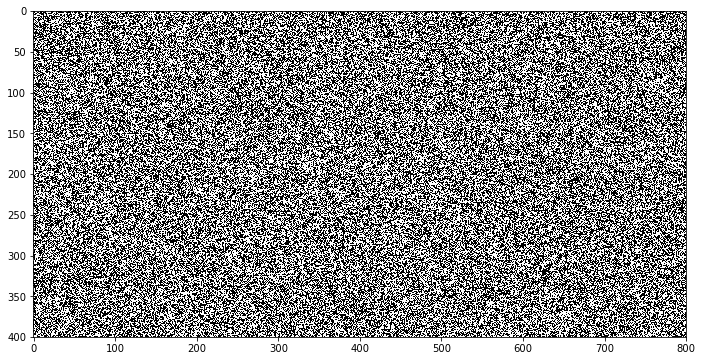

In [11]:
display_img(white_noise)

In [12]:
# create the same scale as the original image 
# multiplying it means that zero values will be zero, or black...
# 1 va;ues will now be 255 and therefore white
white_noise = white_noise * 255

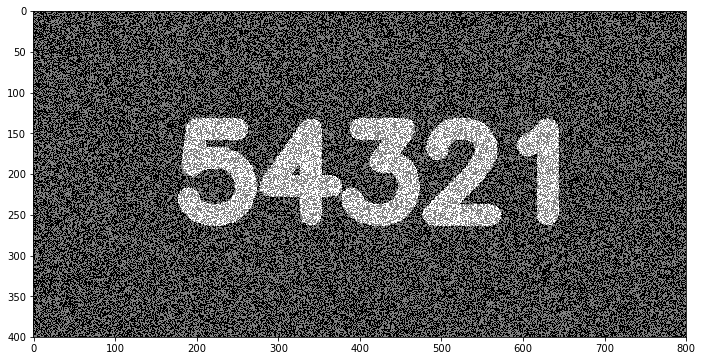

In [13]:
noise_img = white_noise + img
display_img(noise_img)

### Opening

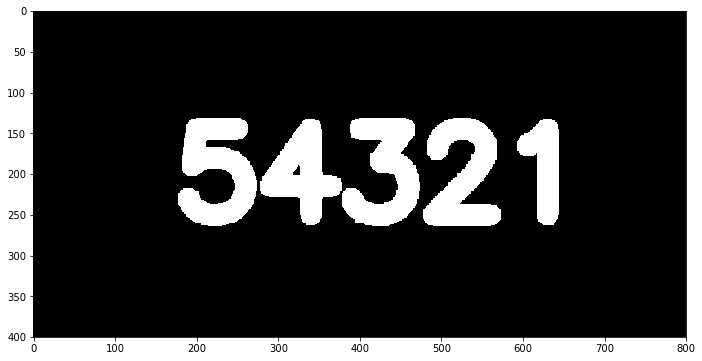

In [156]:
# removal of noise example.
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

# Foreground Noise examples 

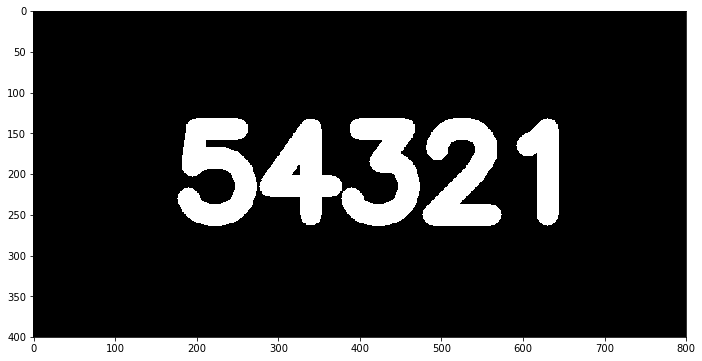

In [157]:
#reset the image 
img = load_img()
display_img(img)

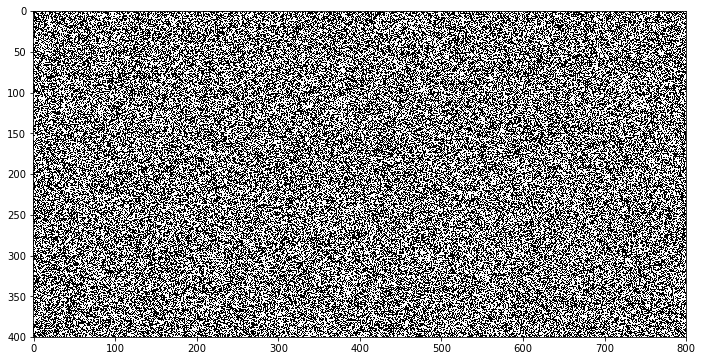

In [158]:
# create a black noise image and display it.
black_noise = np.random.randint(low=0, high=2, size=(400,800))
display_img(black_noise)

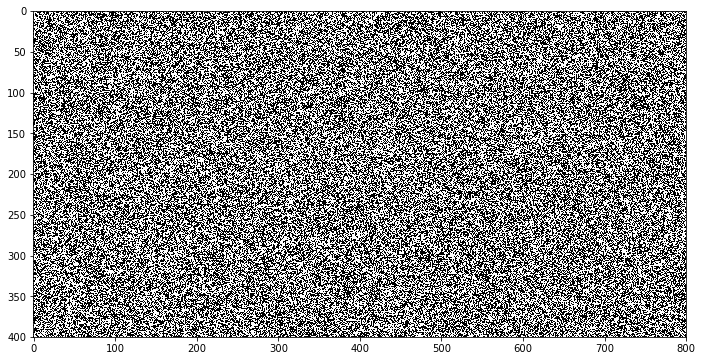

In [159]:
black_noise = black_noise * -255
display_img(black_noise)

In [160]:
black_noise_img = black_noise + img
black_noise_img

array([[   0.,    0.,    0., ..., -255.,    0., -255.],
       [   0.,    0.,    0., ...,    0., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ...,    0., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [-255.,    0., -255., ...,    0.,    0., -255.]])

In [161]:
black_noise_img[black_noise_img==-255] = 0

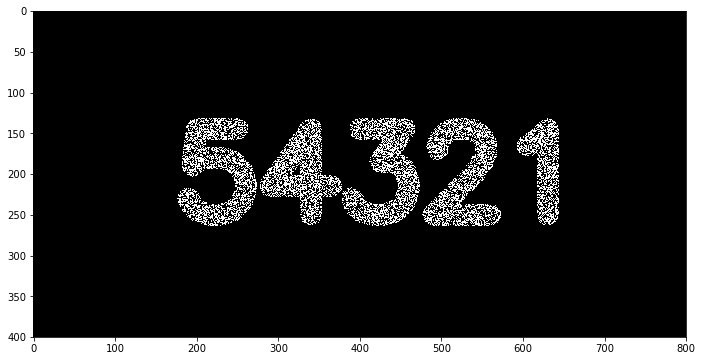

In [162]:
display_img(black_noise_img)

### Closing

Cleaning by closong up the black noise 

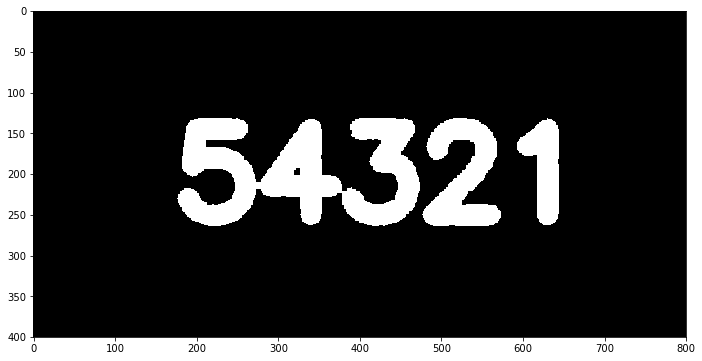

In [165]:
# larger kernel sample 
kernel = np.ones((5,5), dtype=np.uint8)
kernel


closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

# Morphological Gradient

calculating the difference between dilation and erosion of an image

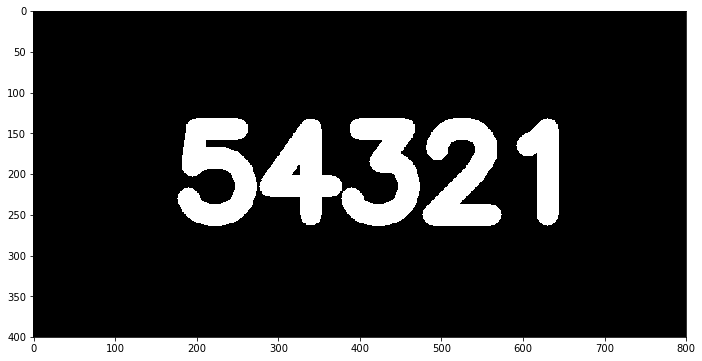

In [166]:
img = load_img()
display_img(img)

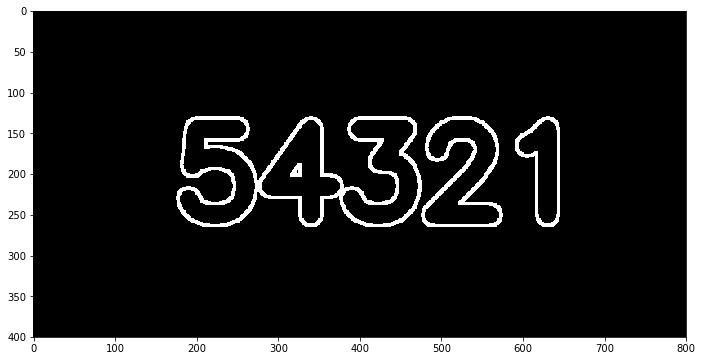

In [167]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)